In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#plt.style.available # For seeing the available chart types in matplotlib.pyplot library

In [ ]:
plt.style.use('seaborn-v0_8')   # Applying the chart type

In [ ]:
path = "/content/housing+(1).xlsx"  # Storing the path of excel file

In [ ]:
data = pd.read_excel(path)  # Reading the excel file and storing it into data variable

data.info() # For getting the insight of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# **INTRODUCTION**

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'.
The data contains information from the 1990 California census. It contains 10 columns and 20640 number of rows. Let's see what each column tells us-
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

Note* - All these details were taken from kaggle website as it was told to explore the data on the internet as well.

So now let's explore the dataset and start solving the following question.

In [ ]:
data.head() # Displaying the top 5 rows of data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


# **Data Types/ Variables**

On the basis of above data we can segregate the columns in the manner.

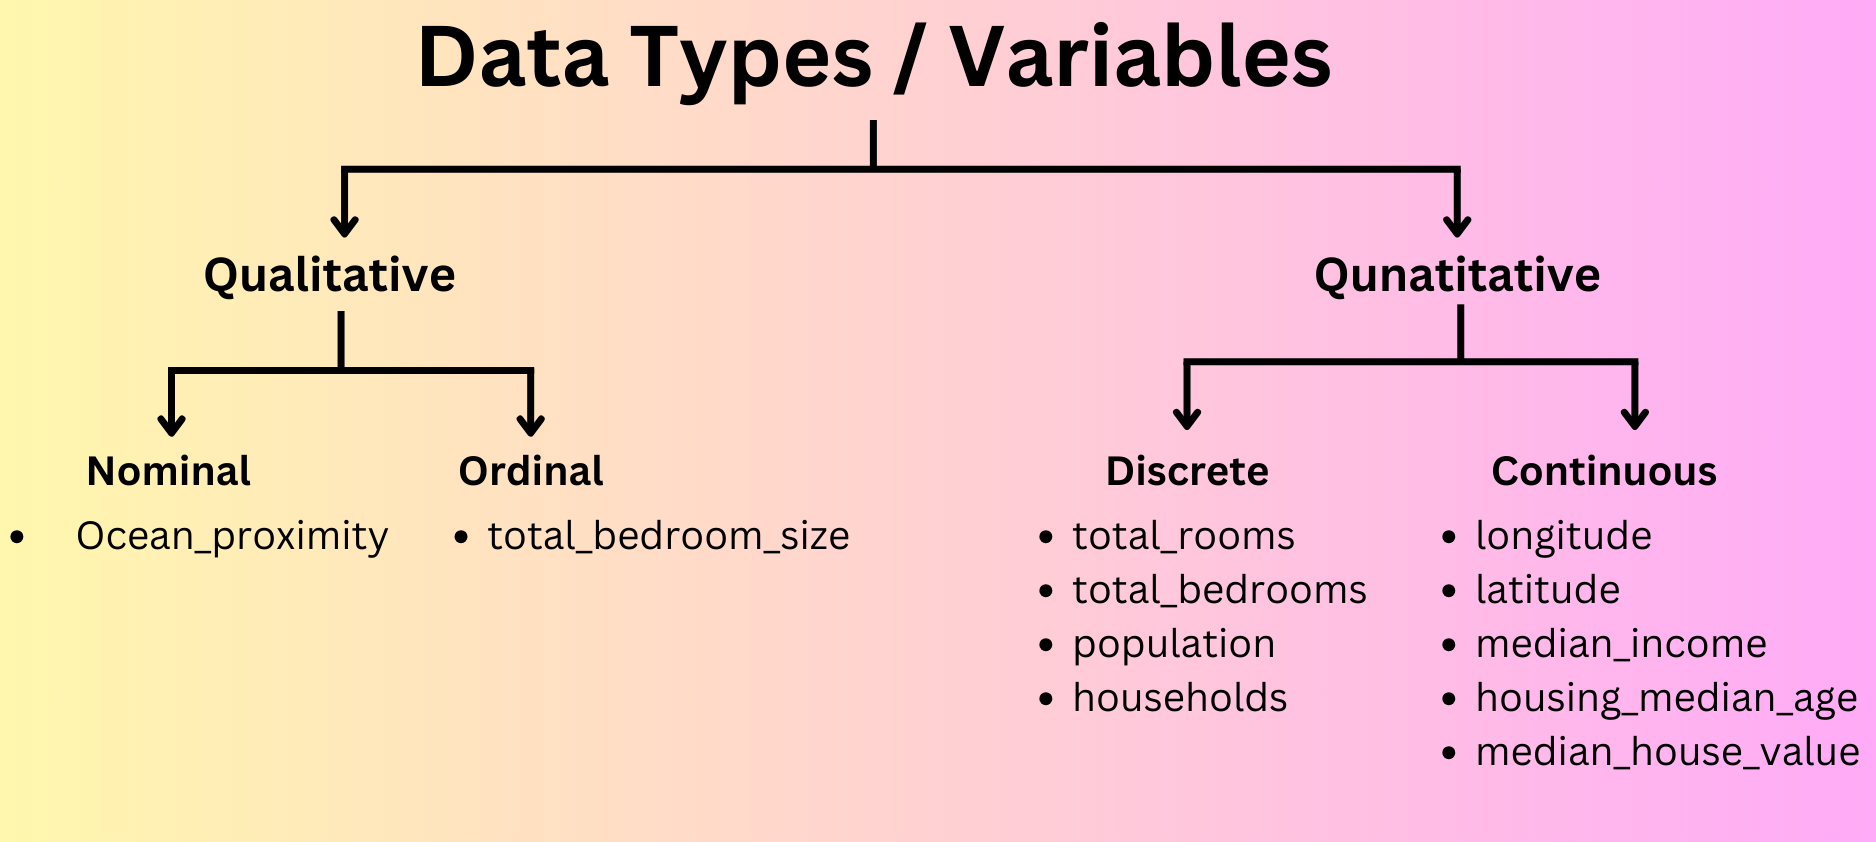

7. **Plot latitude versus longitude and explain your observations.**

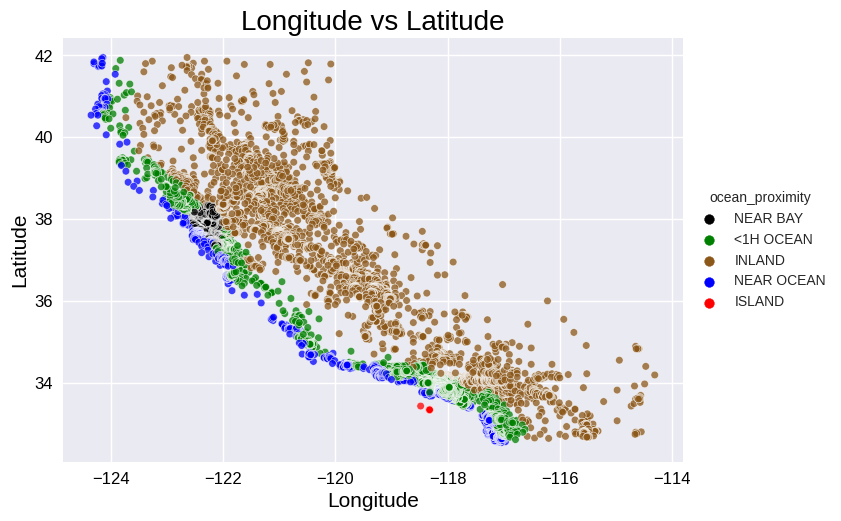

In [ ]:
# scatter plot using seaborn library
sns.scatterplot(x = data['longitude'],y = data['latitude'], hue = data['ocean_proximity'], data = data, marker = 'o',s = 30, alpha = 0.75)
#sns.scatterplot(x = data['latitude'],y = data['longitude'], data = data, marker = 'o',s = 75, alpha = 0.75)

# Replacing color with 'color_list' with desired color palette.
color_list = ['black', 'green', '#8C581A', 'blue', 'red']  #color palette
sns.set_palette(color_list) # Modifying legend colors using sns.set_palette()

plt.grid(True) # for showing grids
plt.title('Longitude vs Latitude',color = 'black', fontsize = 20) # for showing title
plt.xlabel('Longitude',color = 'black', fontsize = 15) # for editing x axis label its color and size
plt.ylabel('Latitude',color = 'black', fontsize = 15) # for editing y axis label its color and size
plt.tick_params(axis='x',labelcolor = 'black', labelsize=12) # for editing x axis scale points its color and size
plt.tick_params(axis='y',labelcolor = 'black', labelsize=12) # for editing y axis scale points its color and size
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'ocean_proximity' ) # for explaining differnt hue values and putting them into a box outside the graph

# Displaying the output
plt.show()

 The scatter plot of latitude vs longitude is just a bunch of points displayed on the graph to make it more understable I added hue parameter as 'ocean_proximity' for the better understanding of the graph like the which points of longitude vs latitude are near and far from the ocean so that it could convey some sort of information.

 From the above we can get the following insights:-
 1. Most of the data points lies on the land side as comperative to ocean side
 2. The data points are some what similar for NEAR OCEAN and <1H OCEAN.
 3. There are some data points which lies inside the ocean also as ISLAND.

 Along with I had plotted the same latitude and longitude coordinates on the world map through folium library, for more understanding of the data.

In [ ]:
import folium
# folium is a library based on Leaflet.js JavaScript library for better presentation of latitude and longitude on actual map

from folium.plugins import MarkerCluster
# 'MarkerCluster' plugin helps by creating clusters of markers, making the map more readable and user-friendly

In [ ]:
lon = list(data['longitude']) # extracting longitude column from data as a list named lon
lat = list(data['latitude']) # extracting latitude column from data as a list named lat
df = pd.DataFrame({'longitude': lon, 'latitude': lat}) # making a custom DataFrame as df from lon and lat list using pd.DataFrame()

In [ ]:
# Initializing the map
my_map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=7)

# folium.Map(): This is the constructor/ syntax method used in Folium.
# location=[df['latitude'].mean(), df['longitude'].mean()]: This parameter sets the initial center location of the map.
# The mean() function calculates the mean value for each specified column.

marker_cluster = MarkerCluster().add_to(my_map) # Making cluster of some data points and grouping them into one and to my_map

# Add markers for each coordinate in the DataFrame using for loop
for index, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(marker_cluster)

# df.iterrows(): For every values in each row (index,Series)
# folium.Marker: For creating marker on the map for each intersection value of longitude and latitude
# add_to(marker_cluster): For grouping the near by location points into one group

# Displaying the map
my_map

Output hidden; open in https://colab.research.google.com to view.

This world map gives us the proper idea about what location points are we analysing. There are few conclusions which can be made on the basis of this map:-

1. **Highest** number of data points lies near to **Los Angles** following with **San Francisco** in the **California** state.
2. **Lowest** number of data points lies for the **Needles** city in **California** state.
3. The number of data points decrease as we go from ocean side to inland side.

1. **What is the average median income of the data set and check the distribution of data using appropriate plots. Please explain the distribution of the plot**

Average median income: 3.87


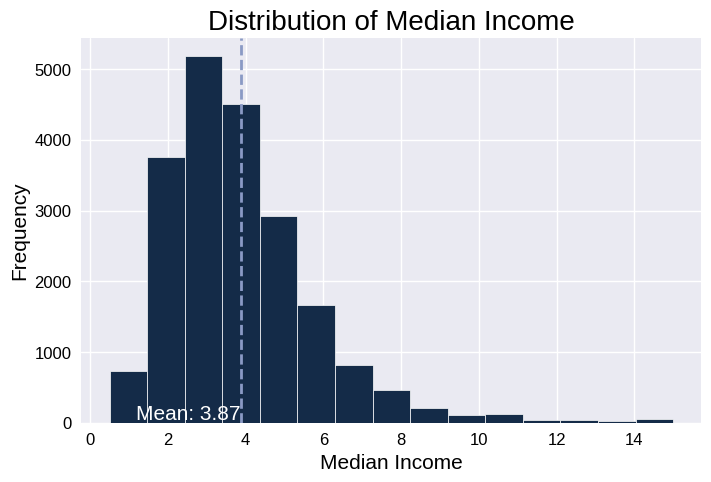

In [ ]:
avg = round(data['median_income'].mean(),2)
print(f"Average median income: {avg}") # calculating and printing average of 'median_income' using .mean() and rounding off it to 2 decimal points.

# Custom size of the figure
plt.figure(figsize=(8, 5)) # changing the figure size using plt.figure(figsize=())

# Plotting the distribution
plt.hist(data['median_income'],bins = 15,color = '#142B48',edgecolor='white', linewidth=0.5)
plt.grid(True)   # For showing the grids in the output
plt.title('Distribution of Median Income',color = 'black', fontsize = 20) # For showing title
plt.xlabel('Median Income',color = 'black', fontsize = 15) # for editing x axis label its color and size
plt.ylabel('Frequency',color = 'black', fontsize = 15) # # for editing y axis label its color and size
plt.tick_params(axis='x',labelcolor = 'black', labelsize=12) # for editing x axis scale points its color and size
plt.tick_params(axis='y',labelcolor = 'black', labelsize=12)  # for editing y axis scale points its color and size

# Adding a vertical line for the mean
plt.axvline(avg, color='#8A9AC5', linestyle='dashed', linewidth=2, label=f'Mean: {avg}')

# Adding text for the mean value
plt.text(avg, 50, f'Mean: {avg}', color='white', ha='right', fontsize = 15)

# Displaying the distribution
plt.show()

From the plot we can clearly understand following points:-
1. This data of median income is right skewed distribution or positively skewed distribution.
2. The mean of this median income is 3.87.
3. Mode of this data lies near 3.

2. **Draw an appropriate plot to see the distribution of housing_median_age and explain your observations.**

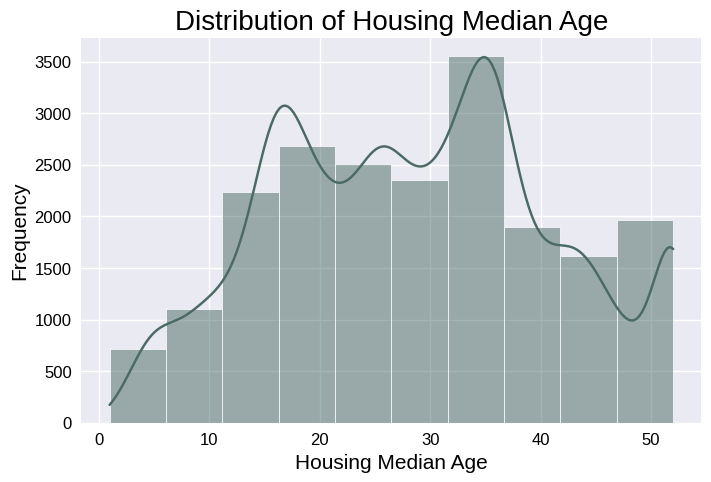

In [ ]:
# Custom size of the figure
plt.figure(figsize=(8, 5)) # changing the figure size using plt.figure(figsize=())

# Plotting the distribution
sns.histplot(data['housing_median_age'],bins = 10,color = '#4A6A63',edgecolor='white', linewidth=0.5, kde = True)

plt.grid(True) # for showing the grids in the output
plt.title('Distribution of Housing Median Age',color = 'black', fontsize = 20) # for showing and editing the title
plt.xlabel('Housing Median Age',color = 'black', fontsize = 15) # for editing x axis label its color and size
plt.ylabel('Frequency',color = 'black', fontsize = 15) # for editing y axis label its color and size
plt.tick_params(axis='x',labelcolor = 'black', labelsize=12) # for editing x axis scale points its color and size
plt.tick_params(axis='y',labelcolor = 'black', labelsize=12) # for editing y axis scale points its color and size

# Displaying the distribution
plt.show()

From this graph we can get the following observations:-
1. Most of the houses are constructed 30 to 40 years ago.
2. New houses (0 to 10) are 50% of most oldest houses (40 to 50).
3. Brodly the houses are 15 to 40 years old.
4. Data is slightly left skewed.

3. **Show with the help of visualization, how median_income and median_house_values are related?**



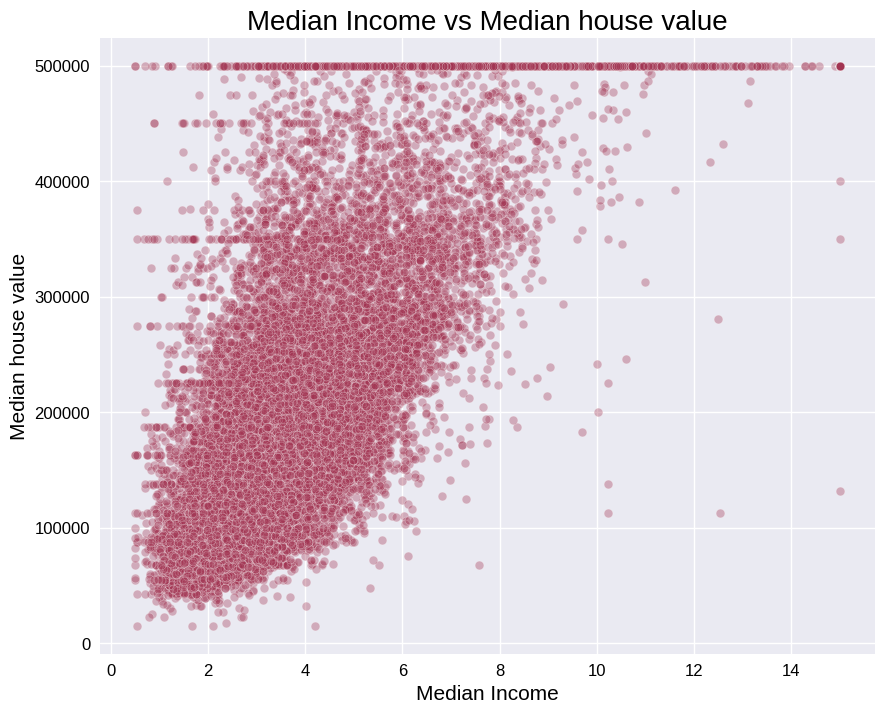

In [ ]:
plt.figure(figsize=(10, 8))
#plt.figure(figsize=(8, 5))


# Plotting the scatter plot using seaborn
sns.scatterplot(x = data['median_income'],y = data['median_house_value'], data = data, marker = 'o', s = 40, color = "#A23452", alpha = 0.35)

plt.title('Median Income vs Median house value',color = 'black', fontsize = 20) # for showing and editing the title
plt.xlabel('Median Income',color = 'black', fontsize = 15) # for editing x axis label its color and size
plt.ylabel('Median house value',color = 'black', fontsize = 15) # for editing y axis label its color and size
plt.tick_params(axis='x',labelcolor = 'black', labelsize=12) # for editing x axis scale points its color and size
plt.tick_params(axis='y',labelcolor = 'black', labelsize=12) # for editing y axis scale points its color and size

# Displaying the plot
plt.show()

From the graph we can cleary understand that
1. 'Median house value' and 'Median Income' are directly proprtional to each other i.e. with the increasing 'Median Income' the 'Median house value' is also increasing.
2. Most of the points lies between the cross section where median income = 8 and
median house value = 350000.
3. But we can see a lot of points on the top side of the plot this can be explained through the following histogram subplots of each variable of x and y axis of the above plot.

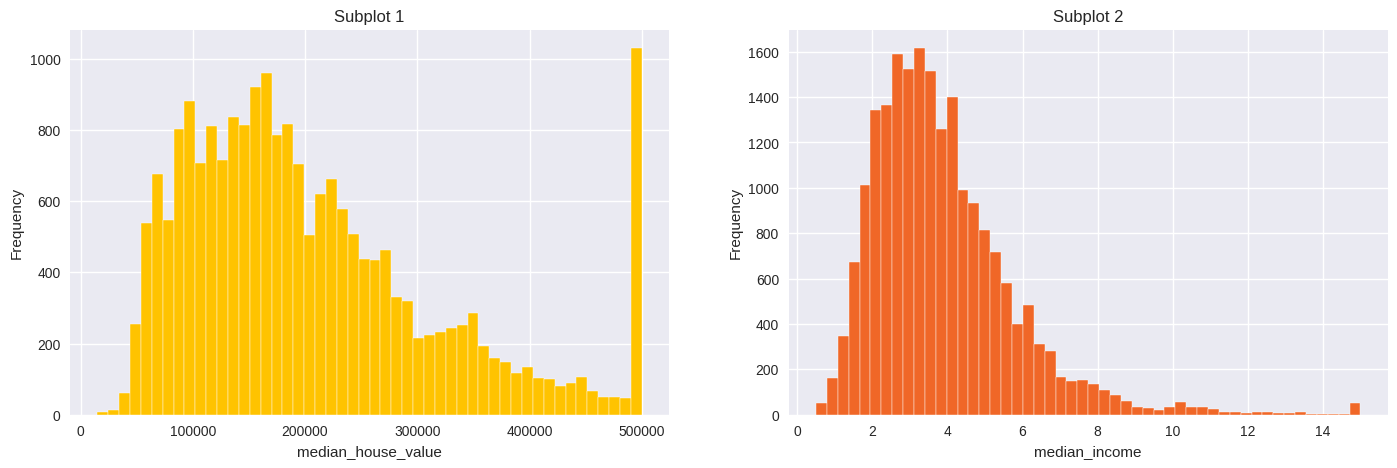

In [ ]:
# Creating data which we want to plot
x1 = data['median_house_value'] # x-axis data for subplot 1
x2 = data['median_income'] # x-axis data for subplot 2

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(17, 5))  # 1 row, 2 columns

# Subplot 1
axs[0].hist((x1), edgecolor = 'white',color = '#FFC300', bins = 50) # Plot on the first subplot
axs[0].set_title('Subplot 1') # Title of Subplot 1
axs[0].set_xlabel('median_house_value') # Label for x-axis
axs[0].set_ylabel('Frequency') # Label for y-axis

# Subplot 2
axs[1].hist((x2), edgecolor = 'white', color = '#F06727', bins = 50)  # Plot on the second subplot
axs[1].set_title('Subplot 2') # Title of Subplot 2
axs[1].set_xlabel('median_income') # Label for x-axis
axs[1].set_ylabel('Frequency') # Label for y-axis

# Displaying the subplots
plt.show()

In [ ]:
a = data['median_house_value']
a.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

1. In subplot 1 frequency for median house value = 500000 is very high that is why we are having so many points in the above scatter point.
2. Frequency of median house value is higher at 500000 so there are many expensive houses in the dataset


**4. Create a data set by deleting the corresponding examples from the data set for which total_bedrooms are not available.**

In [ ]:
# Calculating the total number of NaN in total_bedrooms column
null_count = data['total_bedrooms'].isnull().sum()
print(null_count)

207


In [ ]:
# Creating a new data set ex_data1
ex_data1 = data.dropna(subset = ['total_bedrooms']) # droping/deleting the whole rows for which total_bedrooms aren't availabel

print(f"Total no. of rows in data: {len(data)}")
print(f"Total no. of rows in ex_data1: {len(ex_data1)}")
print(f"Diff of rows: {len(data)-len(ex_data1)}")

Total no. of rows in data: 20640
Total no. of rows in ex_data1: 20433
Diff of rows: 207


In [ ]:
# Displaying the result
ex_data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


Hence as per the question the changed dataset contains 20433 rows which dosen't contain any null data as we know that only this column total_bedrooms has null values earlier.

5. **Create a data set by filling the missing data with the mean value of the total_bedrooms in the original data set.**

In [ ]:
# Calculating average of "total_bedrooms" column of data and rounding off
avg_total_bedrooms = round(data['total_bedrooms'].mean())
print(avg_total_bedrooms)

# Filling the missing data with the mena value of total_bedrooms and storing it into new df ex_data2
ex_data2 = data.fillna(avg_total_bedrooms)

# Cross checking if it contains any null values
null_count = ex_data2['total_bedrooms'].isnull().sum()
print(null_count)

538
0


In [ ]:
ex_data2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


As per the requirement we had now filled all the null values with 538 which is the average of total_bedrooms.

6. **Write a programming construct (create a user defined function) to calculate the median value of the data set wherever required.**

In [ ]:
def median(n):                       # Defining a function named median
  median_value = n.median()          # Function body calculating median of n and storing it into a variable median_value
  print(median_value)                # Printing the median_value

# Extracting the columns as pandas Series which have qualitative data type and storing them in a variable.

longitude = data['longitude']
latitude = data['latitude']
housing_median_age = data['housing_median_age']
total_rooms = data['total_rooms']
total_bedrooms = data['total_bedrooms']
population = data['population']
households = data['total_rooms']
median_income = data['median_income']
median_house_value = data['median_house_value']

# Now on these variables calculating the median value by calling the function median(n) created above and
# Displaying the result

print("Median of longitude:")                # Printing a string which states the called function
median(longitude)                            # Calling the function
print("-------------------------------")     # Printing a dashed line to seperate the output

print("Median of latitude:")
median(latitude)
print("-------------------------------")

print("Median of housing_median_age:")
median(housing_median_age)
print("-------------------------------")

print("Median of total_rooms:")
median(total_rooms)
print("-------------------------------")

print("Median of total_bedrooms:")
median(total_bedrooms)
print("-------------------------------")

print("Median of population:")
median(population)
print("-------------------------------")

print("Median of households:")
median(households)
print("-------------------------------")

print("Median of median_income:")
median(median_income)
print("-------------------------------")

print("Median of median_house_value:")
median(median_house_value)

Median of longitude:
-118.49
-------------------------------
Median of latitude:
34.26
-------------------------------
Median of housing_median_age:
29.0
-------------------------------
Median of total_rooms:
2127.0
-------------------------------
Median of total_bedrooms:
435.0
-------------------------------
Median of population:
1166.0
-------------------------------
Median of households:
2127.0
-------------------------------
Median of median_income:
3.5347999999999997
-------------------------------
Median of median_house_value:
179700.0


The output is self explanatory in itself. And we have achieved this output by calling out the function for all the quantitative data types columns.

8. **Create a data set for which the ocean_proximity is ‘Near ocean’**

In [ ]:
# filtering the data based on the requirements and storing it into a new df - ex_data3
ex_data3 = data[data['ocean_proximity'] == 'NEAR OCEAN']

# Displaying the result
ex_data3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


This output only contains all the other details of columns where ocean_proximity is NEAR OCEAN.

9. **Find the mean and median of the median income for the data set created in question 8.**

In [ ]:
# Mean of median_income column of ex_data3 created in quesstion 8.
avg_median_income = ex_data3['median_income'].mean()

# Median of median_income column of ex_data3 created in quesstion 8.
median_median_income = ex_data3['median_income'].median()

# Displaying the rounded off result
print(f"Avg/Mean of median_income: {round((avg_median_income),2)}")
print(f"Median of median_income: {round((median_median_income),2)}")

Avg/Mean of median_income: 4.01
Median of median_income: 3.65


So this is the Mean and Median of median_income for all the people who live near to the ocean.

10. **Please create a new column named total_bedroom_size. If the total bedrooms is 10 or less, it should be quoted as small. If the total bedrooms is 11 or more but less than 1000, it should be medium, otherwise it should be considered large.**

In [ ]:
# Defining a Function to categorize total bedrooms

def categorize_size(value):
    if value <= 10:                 # if - elif - else condition based on the requirements
        return 'SMALL'              # returning the desired output whenever the condition satisfies
    elif 11 <= value < 1000:
        return 'MEDIUM'
    else:
        return 'LARGE'

# Creating a new categorical column 'total_bedrooms_size' on the basis of 'total_bedroom' column and applying the function over it.

data['total_bedroom_size'] = data['total_bedrooms'].apply(categorize_size)

# Displaying the result
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroom_size
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,MEDIUM
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,LARGE
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,MEDIUM
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,MEDIUM
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,MEDIUM
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,MEDIUM
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,MEDIUM
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,MEDIUM


As per the reqirement we had created a new column as total_bedroom_size on the basis of the total_bedrooms by applying the function over it.